# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [6]:
import pandas as pd

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [2]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [ ]:
# 10 + 1 target -- 6 de ellas son medidas de los niveles sanguíneos y las otras 4
# son características físicas de la persona. 
# La variable que queremos predecir es un indicador de la evolución de la enfermedad 
# 1 año después de la toma de la muestra.

# La combinación de las medidas que hay en data nos ayudará a determinar la evolución
# que tendrá un año después el paciente.

# 442 entradas/registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [9]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [11]:
import numpy as np

In [16]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [23]:
arr_diab = np.hstack((diabetes['data'], diabetes['target'].reshape(-1, 1)))
df_diab = pd.DataFrame(arr_diab, columns=diabetes['feature_names']+['target'])
df_diab

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [24]:
df_diab.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s2'}>],
       [<AxesSubplot:title={'center':'s3'}>,
        <AxesSubplot:title={'center':'s4'}>,
        <AxesSubplot:title={'center':'s5'}>],
       [<AxesSubplot:title={'center':'s6'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

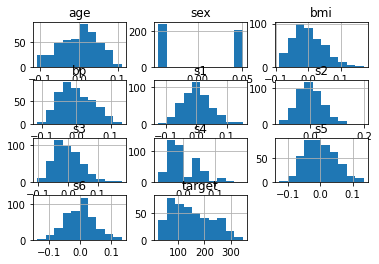

In [25]:
df_diab.hist()

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [28]:
diab_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [30]:
X = diabetes['data']
y = diabetes['target']

diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = \
    train_test_split(X, y, test_size=20, shuffle=False)

In [35]:
np.all(diabetes_data_test == X[-20:])

True

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [36]:
diab_model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [37]:
diab_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [39]:
diab_model.coef_, diab_model.intercept_

(array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
        -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
         7.43519617e+02,  7.60951722e+01]),
 152.76430691633442)

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [40]:
y_hat = diab_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [42]:
print(diabetes_target_test)
print(y_hat)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]
[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]


#### Is `diabetes_target_test` exactly the same as the model prediction?

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
res = diabetes_target_test - y_hat

mae_man = np.abs(res).mean()
mae = mean_absolute_error(y_pred=y_hat, y_true=diabetes_target_test)
print("MAE:\t {:.2f} (Manual) \t {:.2f} (SKLEARN)".format(mae_man, mae))

mse_man = (res ** 2).mean()
mse = mean_squared_error(y_pred=y_hat, y_true=diabetes_target_test)
print("MSE:\t {:.2f} (Manual) \t {:.2f} (SKLEARN)".format(mse_man, mse))

rmse_man = np.sqrt((res ** 2).mean())
rmse = mean_squared_error(y_pred=y_hat, y_true=diabetes_target_test, squared=False)
print("RMSE:\t {:.2f} (Manual) \t {:.2f} (SKLEARN)".format(rmse_man, rmse))


MAE:	 36.61 (Manual) 	 36.61 (SKLEARN)
MSE:	 2004.57 (Manual) 	 2004.57 (SKLEARN)
RMSE:	 44.77 (Manual) 	 44.77 (SKLEARN)


#### Which are the most important features?

In [51]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

<BarContainer object of 10 artists>

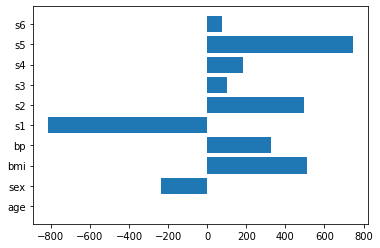

In [52]:
import matplotlib.pyplot as plt
plt.barh(diabetes['feature_names'], diab_model.coef_)

In [54]:
diab_model.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [63]:
df_imp = pd.DataFrame(diab_model.coef_, index=diabetes['feature_names'], columns=['coefs'])
df_imp = df_imp.abs().sort_values(ascending=True, by='coefs')
df_imp

,coefs
age,0.303500
s6,76.095172
s3,102.848452
s4,184.606489
sex,237.639315
bp,327.736980
s2,492.814588
bmi,510.530605
s5,743.519617
s1,814.131709


In [66]:
90/(1.80 ** 2)

27.777777777777775

<AxesSubplot:>

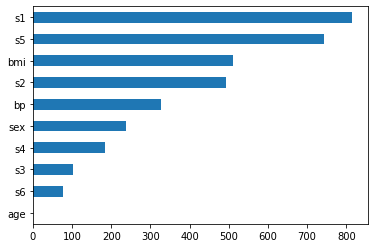

In [65]:
df_imp.plot(kind='barh', legend=False)